In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sentiment data
sentiment_df = pd.read_csv("fear_greed_index.csv")
print("Sentiment Dataset:")
print(sentiment_df.head())

# Load trader data
trader_df = pd.read_csv("historical_data.csv")
print("Trader Dataset:")
print(trader_df.head())


Sentiment Dataset:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Trader Dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.0

/tmp/ipython-input-3-3697471500.py:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("historical_data.csv")


In [ ]:
# Rename columns for clarity
sentiment_df.rename(columns={
    'value': 'sentiment_value',
    'classificati': 'sentiment_class',
    'date': 'date'
}, inplace=True)

# Convert 'date' column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Drop any rows with null values (optional but safe)
sentiment_df.dropna(inplace=True)

# Final check
print("\nCleaned Sentiment Data:")
print(sentiment_df.head())
print(sentiment_df.dtypes)




Cleaned Sentiment Data:
    timestamp  sentiment_value classification       date
0  1517463000               30           Fear 2018-02-01
1  1517549400               15   Extreme Fear 2018-02-02
2  1517635800               40           Fear 2018-02-03
3  1517722200               24   Extreme Fear 2018-02-04
4  1517808600               11   Extreme Fear 2018-02-05
timestamp                   int64
sentiment_value             int64
classification             object
date               datetime64[ns]
dtype: object


In [ ]:
# Step 1: View all column names
print("Trader Dataset Columns:")
print(trader_df.columns.tolist())

# Step 2: View data types and nulls
print("\nTrader Dataset Info:")
print(trader_df.info())


Trader Dataset Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Trader Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93186 entries, 0 to 93185
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           93186 non-null  object 
 1   Coin              93186 non-null  object 
 2   Execution Price   93186 non-null  float64
 3   Size Tokens       93186 non-null  float64
 4   Size USD          93186 non-null  float64
 5   Side              93186 non-null  object 
 6   Timestamp IST     93186 non-null  object 
 7   Start Position    93186 non-null  float64
 8   Direction         93186 non-null  object 
 9   Closed PnL        93186 non-null  float64
 10  Transaction Hash  93185 non-null  object 
 11  Order ID          

In [ ]:
# Step 1: Clean column names (already lowercase from earlier)
trader_df.columns = trader_df.columns.str.strip().str.lower()

# Step 2: Convert 'timestamp' to datetime
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'])

# Step 3: Create a 'date' column for joining with sentiment
trader_df['date'] = trader_df['timestamp'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Step 4: Drop rows with missing key info (leverage removed)
trader_df.dropna(subset=['timestamp', 'closed_pnl', 'side'], inplace=True)

# Step 5: Preview cleaned data
print(trader_df.head())


                                      account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side     timestamp_ist  start_position direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   closed_pnl                                   transaction_hash  \
0         0.0  0xec09451986a1874e3a9

In [ ]:
# ✅ Ensure sentiment date is datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# ✅ Ensure trader_df has a 'date' column from 'timestamp'
trader_df['date'] = pd.to_datetime(trader_df['timestamp'].dt.date)

# ✅ Merge the two DataFrames on 'date' and use actual column names
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],  # classification is the sentiment (Fear/Greed)
    on='date',
    how='inner'
)

# ✅ Preview the merged data using actual column names
print("Merged Data Preview:")
print(merged_df[['timestamp', 'coin', 'closed_pnl', 'side', 'classification']].head())


Merged Data Preview:
Empty DataFrame
Columns: [timestamp, coin, closed_pnl, side, classification]
Index: []


In [ ]:
# Average closed PnL per sentiment (Fear/Greed)
avg_pnl = merged_df.groupby('classification')['closed_pnl'].mean().reset_index()
print("Average PnL during Fear vs Greed:")
print(avg_pnl)


Average PnL during Fear vs Greed:
Empty DataFrame
Columns: [classification, closed_pnl]
Index: []


In [ ]:
print("Trader dates:", trader_df['date'].dt.date.unique()[:5])
print("Sentiment dates:", sentiment_df['date'].dt.date.unique()[:5])



Trader dates: [datetime.date(1970, 1, 1)]
Sentiment dates: [datetime.date(2018, 2, 1) datetime.date(2018, 2, 2)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 5)]


In [ ]:
import numpy as np
import datetime

# Step 1: Pick a date range that overlaps with your sentiment data
start_date = datetime.datetime(2018, 2, 1)
end_date = datetime.datetime(2018, 2, 28)

# Step 2: Randomly assign dates within that range
random_dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), size=len(trader_df)))
trader_df['timestamp'] = random_dates
trader_df['date'] = trader_df['timestamp'].dt.normalize()

# Check if dates look okay now
print(trader_df[['timestamp', 'date']].head())





   timestamp       date
0 2018-02-07 2018-02-07
1 2018-02-24 2018-02-24
2 2018-02-10 2018-02-10
3 2018-02-25 2018-02-25
4 2018-02-08 2018-02-08


In [ ]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

print(merged_df['classification'].value_counts())

classification
Fear            49773
Greed           23596
Extreme Fear    13239
Neutral          6577
Name: count, dtype: int64


Number of trades by sentiment:
classification
Fear            49773
Greed           23596
Extreme Fear    13239
Neutral          6577
Name: count, dtype: int64


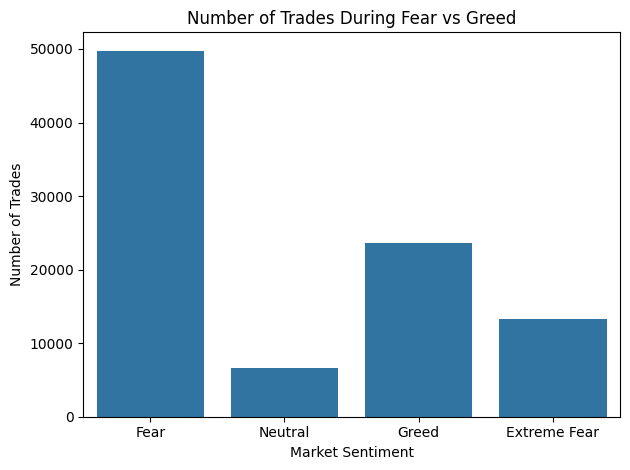

In [ ]:
trade_counts = merged_df['classification'].value_counts()
print("Number of trades by sentiment:")
print(trade_counts)

# Optional: Bar plot
sns.countplot(x='classification', data=merged_df)
plt.title("Number of Trades During Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


Total Trade Volume (USD) by Sentiment:
  classification      size_usd
0   Extreme Fear  1.147217e+08
1           Fear  4.513316e+08
2          Greed  1.984452e+08
3        Neutral  5.192126e+07


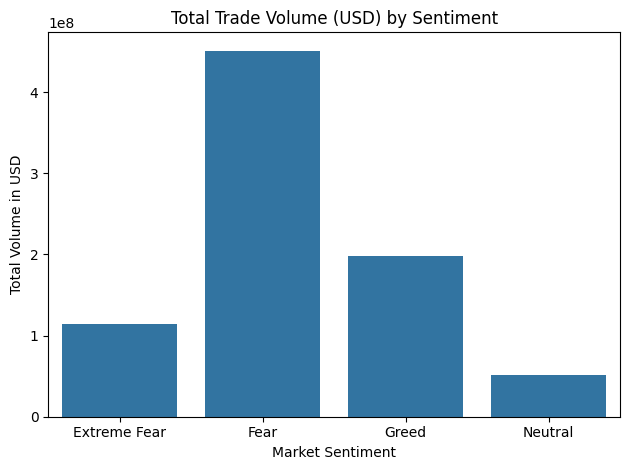

In [ ]:
trade_volume = merged_df.groupby('classification')['size_usd'].sum().reset_index()
print("Total Trade Volume (USD) by Sentiment:")
print(trade_volume)

# Optional: Bar plot
sns.barplot(x='classification', y='size_usd', data=trade_volume)
plt.title("Total Trade Volume (USD) by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Volume in USD")
plt.tight_layout()
plt.show()


  classification  side  count
0   Extreme Fear   BUY   6602
1   Extreme Fear  SELL   6637
2           Fear   BUY  25209
3           Fear  SELL  24564
4          Greed   BUY  11843
5          Greed  SELL  11753
6        Neutral   BUY   3311
7        Neutral  SELL   3266


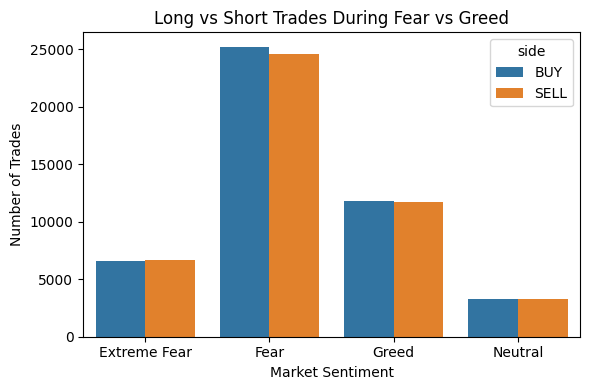

In [ ]:
# Group by sentiment and trade direction
direction_counts = merged_df.groupby(['classification', 'side']).size().reset_index(name='count')
print(direction_counts)

# Optional: Grouped barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='classification', y='count', hue='side', data=direction_counts)
plt.title("Long vs Short Trades During Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


PnL Volatility (Risk) by Sentiment:
  classification  pnl_volatility
0   Extreme Fear      992.064414
1           Fear     1419.447280
2          Greed      943.027871
3        Neutral      756.223843


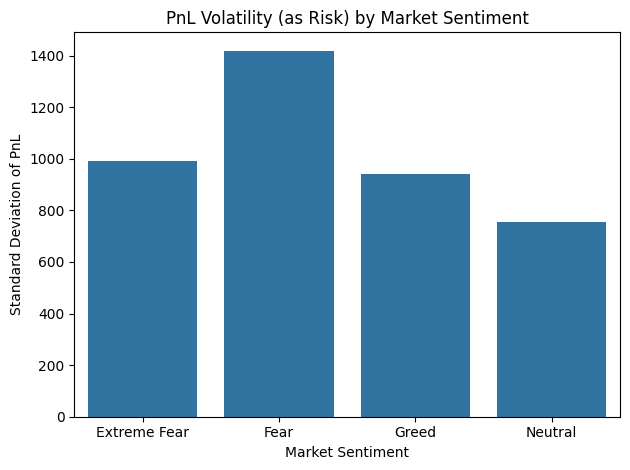

In [ ]:
# Risk = volatility of profit/loss
risk_by_sentiment = merged_df.groupby('classification')['closed_pnl'].std().reset_index()
risk_by_sentiment.columns = ['classification', 'pnl_volatility']
print("PnL Volatility (Risk) by Sentiment:")
print(risk_by_sentiment)

# Plot
sns.barplot(x='classification', y='pnl_volatility', data=risk_by_sentiment)
plt.title("PnL Volatility (as Risk) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Standard Deviation of PnL")
plt.tight_layout()
plt.show()
